In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../data/comma2k19_chunk1_data.csv')
data.head()

,image_path,speed,steering_angle
0,../data/comma2k19/Chunk_1/b0c9d2329ad1606b|201...,26.053472,0.1
1,../data/comma2k19/Chunk_1/b0c9d2329ad1606b|201...,26.281250,4.3
2,../data/comma2k19/Chunk_1/b0c9d2329ad1606b|201...,27.693056,-4.7
3,../data/comma2k19/Chunk_1/b0c9d2329ad1606b|201...,29.635417,-0.4
4,../data/comma2k19/Chunk_1/b0c9d2329ad1606b|201...,30.695833,2.2


In [5]:
data.describe()

,speed,steering_angle
count,188.000000,188.000000
mean,21.836961,0.200532
std,10.958981,4.908265
min,0.000000,-11.700000
25%,12.913368,-1.725000
50%,26.714931,-0.200000
75%,29.720833,1.900000
max,35.767361,28.400000


In [28]:
data.describe()['speed']['std']**2

np.float64(120.09925843560457)

In [30]:
data.describe()['steering_angle']['std']**2

np.float64(24.091069234270105)

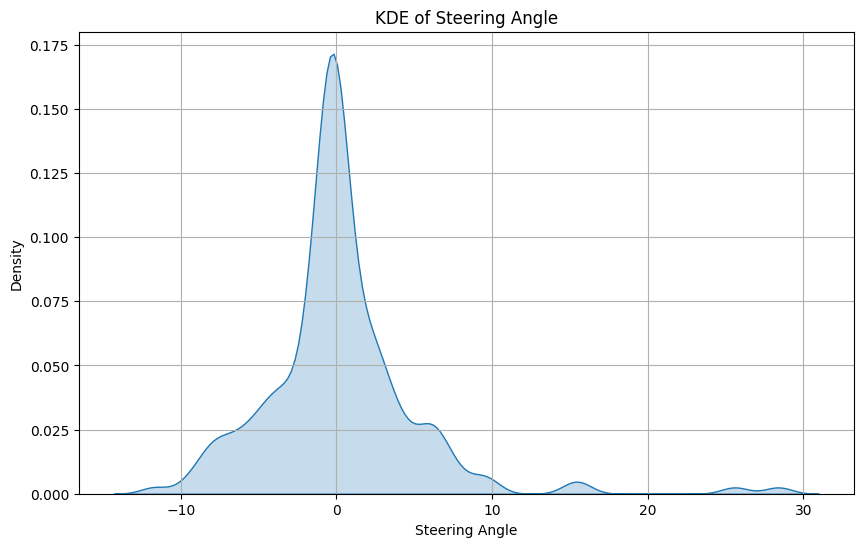

In [7]:
# kdeplot of steering angle
plt.figure(figsize=(10, 6))
sns.kdeplot(data['steering_angle'], fill=True, bw_adjust=0.5)
plt.title('KDE of Steering Angle')
plt.xlabel('Steering Angle')
plt.ylabel('Density')
plt.grid()
plt.show()

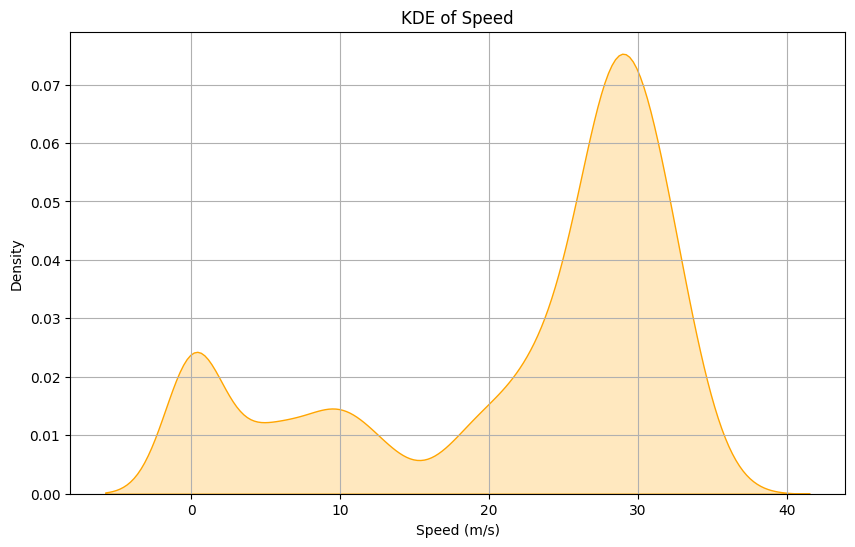

In [8]:
# kdeplot of speed
plt.figure(figsize=(10, 6))
sns.kdeplot(data['speed'], fill=True, bw_adjust=0.5, color='orange')
plt.title('KDE of Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Density')
plt.grid()
plt.show()

/var/folders/2z/6m84byrs1b3drp3528hjvtrm0000gn/T/ipykernel_55002/316874201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=steering_counts.index, y=steering_counts.values, palette='viridis')


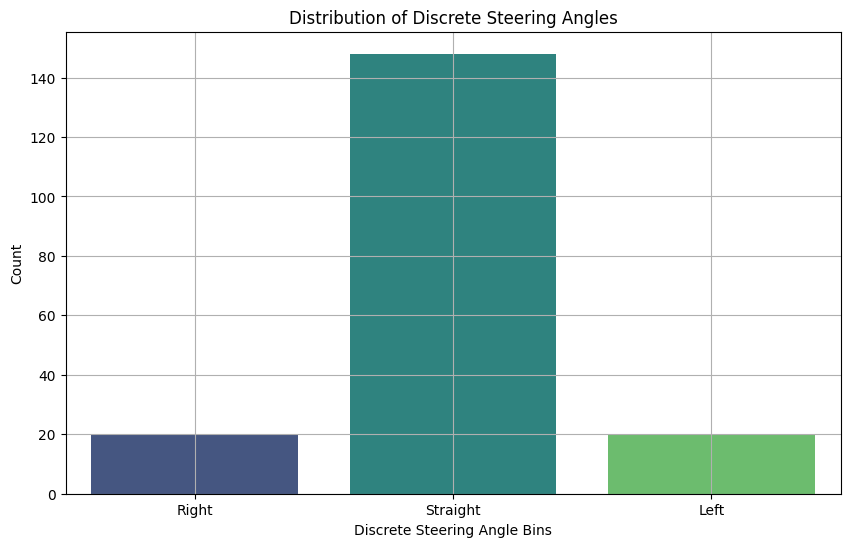

In [26]:
bins = [-np.inf, -5, 5, np.inf]
data['discrete_steering'] = pd.cut(data['steering_angle'], bins=bins, labels=['Right', 'Straight', 'Left'], include_lowest=True, right=True)
steering_counts = data['discrete_steering'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=steering_counts.index, y=steering_counts.values, palette='viridis')
plt.title('Distribution of Discrete Steering Angles')
plt.xlabel('Discrete Steering Angle Bins')
plt.ylabel('Count')
plt.grid()
plt.show()

In [27]:
# Proportion of baseline steering
bins = [-np.inf, -5, 5, np.inf]
data.value_counts(pd.cut(data['steering_angle'], bins=bins, labels=['Right', 'Straight', 'Left'], include_lowest=True, right=True), normalize=True)


steering_angle
Straight    0.787234
Right       0.106383
Left        0.106383
Name: proportion, dtype: float64

/var/folders/2z/6m84byrs1b3drp3528hjvtrm0000gn/T/ipykernel_55002/900408599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=speed_counts.index, y=speed_counts.values, palette='viridis')


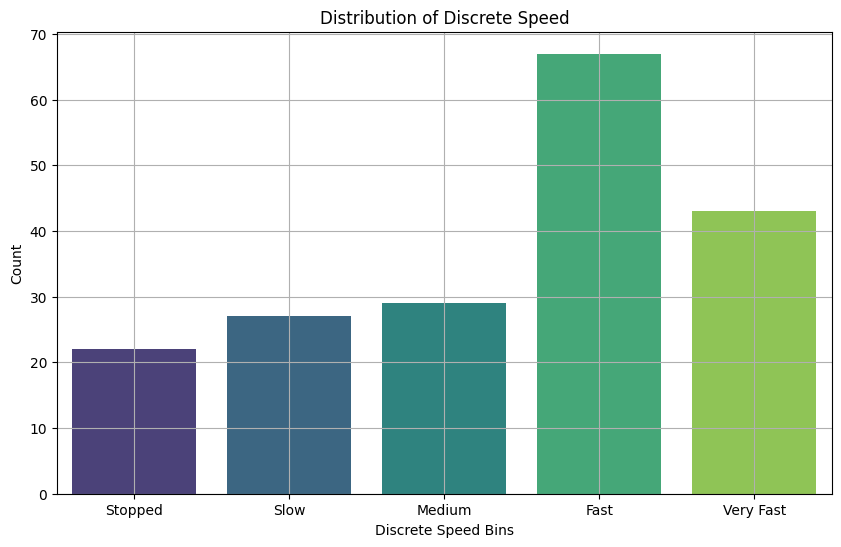

In [23]:
bins = [0, 2.5, 15, 25, 30, np.inf]
data['discrete_speed'] = pd.cut(data['speed'], bins=bins, labels=['Stopped', 'Slow', 'Medium', 'Fast', 'Very Fast'], include_lowest=True, right=True)
speed_counts = data['discrete_speed'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=speed_counts.index, y=speed_counts.values, palette='viridis')
plt.title('Distribution of Discrete Speed')
plt.xlabel('Discrete Speed Bins')
plt.ylabel('Count')
plt.grid()
plt.show()

In [25]:
# Proportion of baseline steering
bins = [0, 2.5, 15, 25, 30, np.inf]
data.value_counts(pd.cut(data['speed'], bins=bins, labels=['Stopped', 'Slow', 'Medium', 'Fast', 'Very Fast'], include_lowest=True, right=True), normalize=True)

speed
Fast         0.356383
Very Fast    0.228723
Medium       0.154255
Slow         0.143617
Stopped      0.117021
Name: proportion, dtype: float64